In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [9]:
import chardet

# Open the file in binary mode
with open("SeoulBikeData.csv", "rb") as f:
    rawdata = f.read(100000)  # read first 100KB for detection
    result = chardet.detect(rawdata)

print(result)


{'encoding': 'ISO-8859-9', 'confidence': 0.7583842623371586, 'language': 'Turkish'}


In [33]:
import pandas as pd

# Use UTF-8 (most common)
df = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

# If that fails, try Latin-1 (ISO-8859-1)
# df = pd.read_csv("file.csv", encoding="latin1")



# Option 2: using forward slashes
# df = pd.read_csv('fcc-ml/SeoulBikeData.csv', encoding='latin1')

df.head()
df = df.drop(["Holiday","Date","Seasons"],axis =1)
# df.head()
df["Functioning Day"] = df["Functioning Day"].map({'Yes': 1, 'No': 0})
#df.head()
df = df[df["Hour"] == 12] 
# df.head()
df = df.drop(["Hour"],axis =1)
df.head()




,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


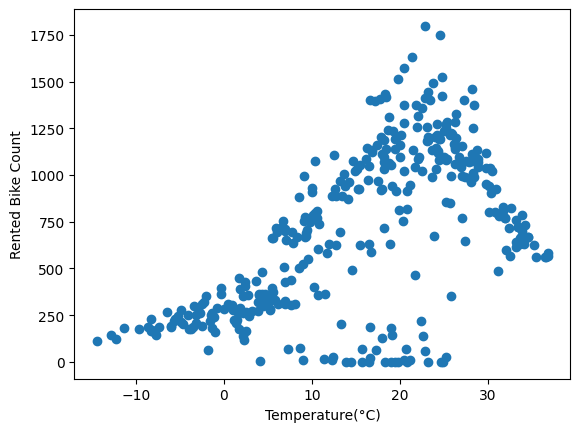

C:\Users\anubh\AppData\Local\Temp\ipykernel_7748\370288032.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


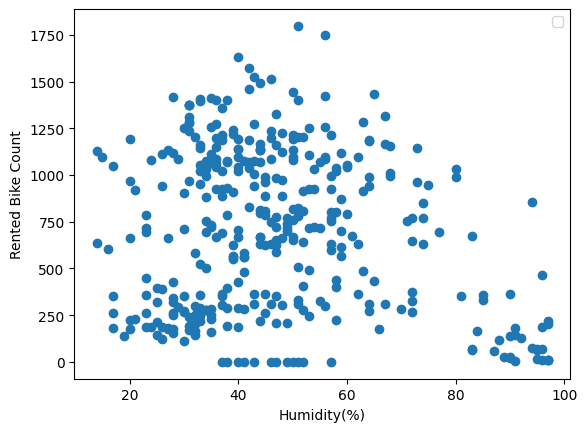

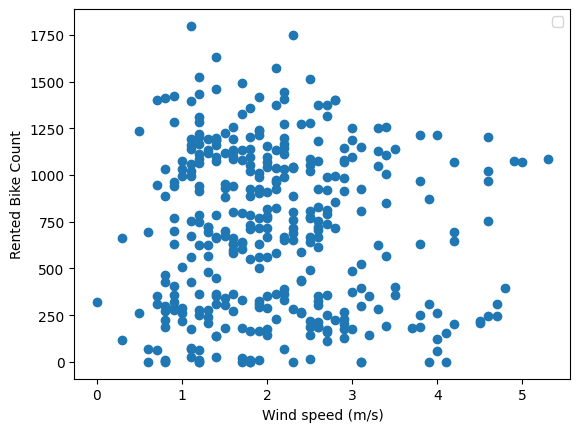

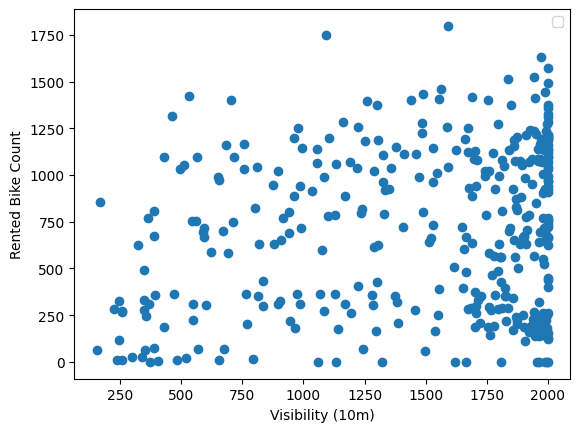

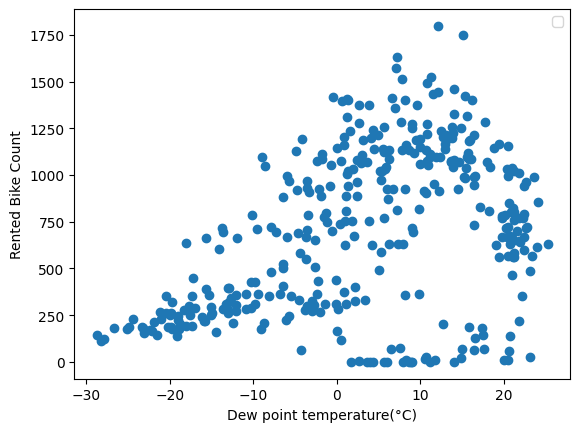

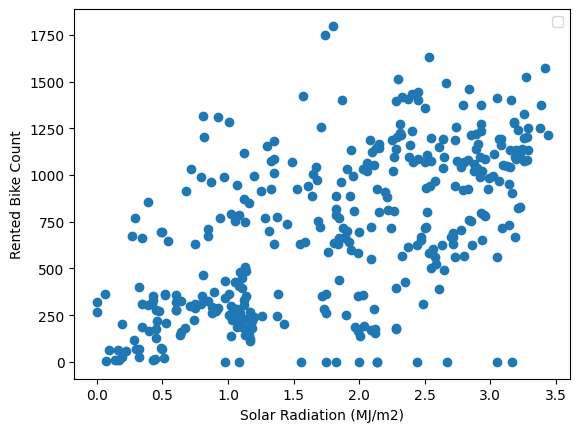

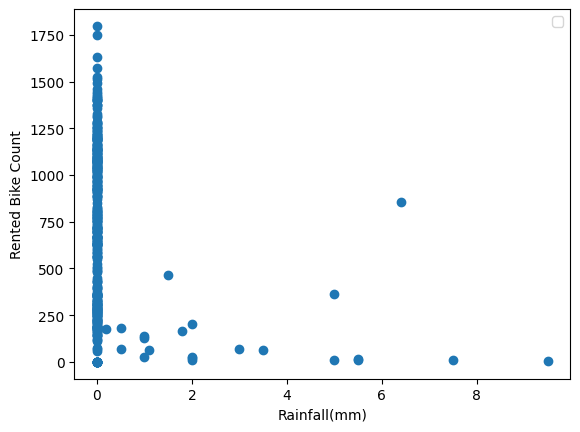

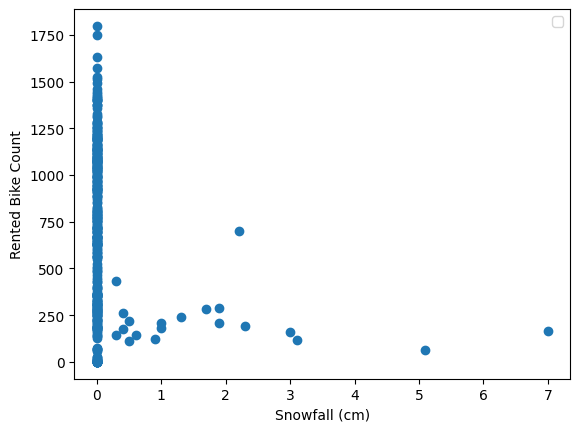

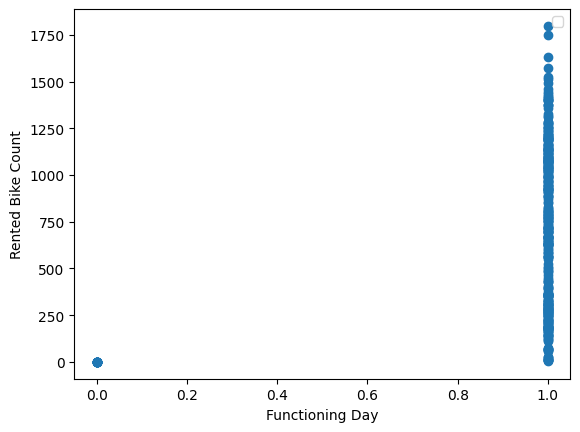

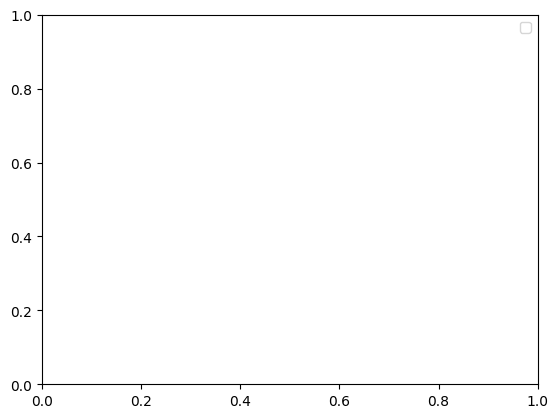

In [35]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["Rented Bike Count"])
    plt.xlabel(label)
    plt.ylabel("Rented Bike Count")
    plt.show()
    plt.legend()
      

In [39]:
df.drop(["Visibility (10m)","Wind speed (m/s)","Functioning Day"],axis =1,inplace =True)

In [40]:
import copy
import numpy as np
import pandas as pd

def get_xy(dataframe, y_label, x_labels=None):
    """
    Separates a pandas DataFrame into features (X) and a target (y) as NumPy arrays.

    This function is useful for preparing data for machine learning models. It can
    handle cases where specific feature columns are provided or when all columns
    except the target column should be used as features.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the data.
        y_label (str): The name of the column to be used as the target (y).
        x_labels (list, optional): A list of column names to be used as features (X).
                                   If None, all columns except y_label are used.
                                   Defaults to None.

    Returns:
        tuple: A tuple containing three NumPy arrays:
               - X (np.ndarray): The feature data.
               - y (np.ndarray): The target data, reshaped to a column vector.
               - data (np.ndarray): The combined X and y arrays, horizontally stacked.
    """
    # Create a deep copy to avoid modifying the original DataFrame
    dataframe = copy.deepcopy(dataframe)

    # Determine the feature set X
    if not x_labels:
        # If no x_labels are provided, use all columns except the y_label
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        # If specific x_labels are provided
        if len(x_labels) == 1:
            # For a single feature, reshape to a 2D array (n_samples, 1)
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            # For multiple features, get their values directly
            X = dataframe[x_labels].values

    # Extract the target variable y and reshape it to a 2D array (n_samples, 1)
    y = dataframe[y_label].values.reshape(-1, 1)

    # Horizontally stack the feature and target arrays to create a combined dataset
    data = np.hstack((X, y))
    
    # The original function did not specify a return value,
    # but returning the processed arrays is standard practice.
    return X, y, data

In [83]:
train,val,test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

c:\Users\anubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [81]:
_,X_train_hum,y_train_hum = get_xy(df,"Rented Bike Count",x_labels=["Rainfall(mm)"])
_,X_val_hum,y_val_hum= get_xy(val,"Rented Bike Count",x_labels=["Rainfall(mm)"])
_,X_test_hum,y_test_hum = get_xy(test,"Rented Bike Count",x_labels=["Rainfall(mm)"])

In [85]:
# X_train_hum
print(X_train_hum.shape)
print(y_train_hum.shape)

(365, 1)
(365, 2)


In [84]:
model = LinearRegression()
model.fit(X_train_hum,y_train_hum)
a = model.coef_
b = model.intercept_
print(a)
print(b)
print(f"y = {a[0][0]}*x + {b[0]}")
print(model.score(X_val_hum,y_val_hum))


[[-5.49602743e-04]
 [ 1.00000000e+00]]
[0.56934625 0.        ]
y = -0.0005496027425745765*x + 0.5693462514200522
0.5158239400019523


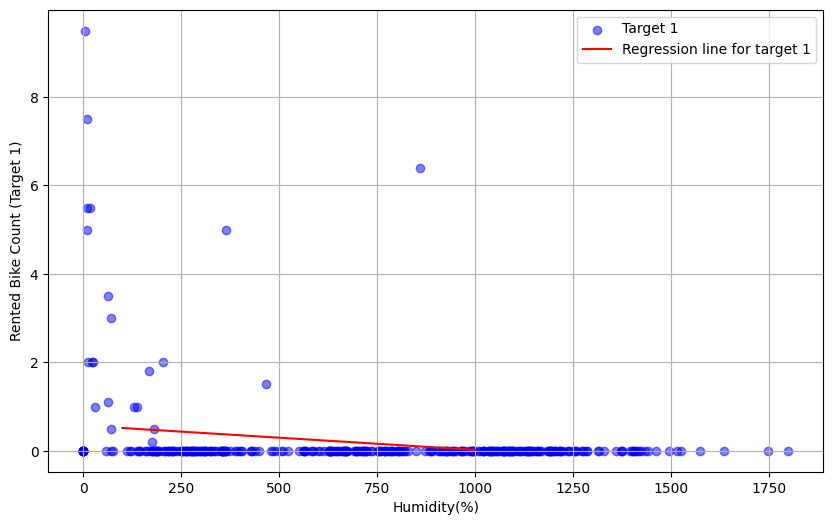

In [87]:
plt.figure(figsize=(10, 6))

# take first target column
plt.scatter(X_train_hum.ravel(), y_train_hum[:, 0], 
            label="Target 1", color="blue", alpha=0.5)


# regression line
x = tf.linspace(100, 1000, 10)
x_np = x.numpy().reshape(-1, 1)
plt.plot(x_np, model.predict(x_np)[:, 0], color="red", label="Regression line for target 1")

plt.legend()
plt.xlabel("Humidity(%)")
plt.ylabel("Rented Bike Count (Target 1)")
plt.grid(True)
plt.show()



In [88]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_hum.reshape(-1))

c:\Users\anubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [90]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [91]:
history = temp_nn_model.fit(
    X_train_hum.reshape(-1), y_train_hum,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_hum, y_val_hum)
)

In [92]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

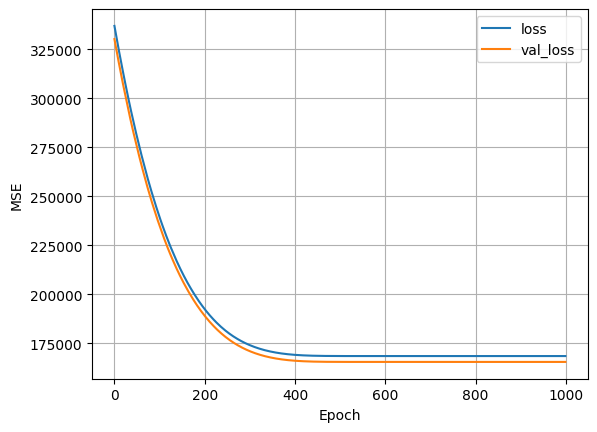

In [93]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


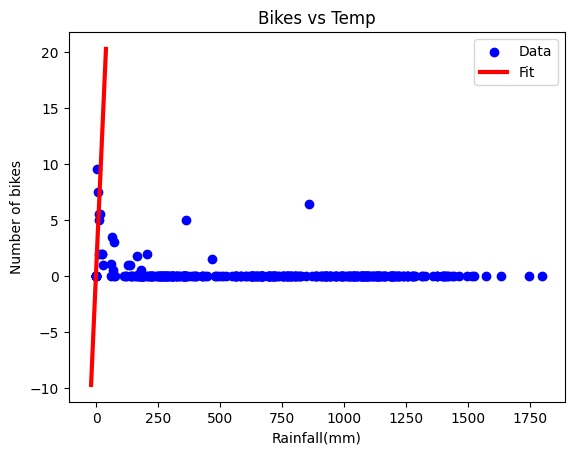

In [96]:
plt.scatter(X_train_hum.ravel(), y_train_hum[:,0], label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Rainfall(mm)")
plt.show()

In [98]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_hum.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\anubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
history = nn_model.fit(
    X_train_hum, y_train_hum,
    validation_data=(X_val_hum, y_val_hum),
    verbose=0, epochs=100
)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


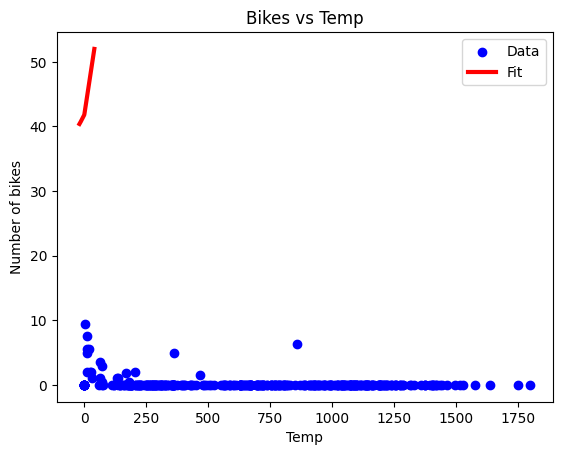

In [100]:
plt.scatter(X_train_hum.ravel(), y_train_hum[:,0], label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()